In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.dpi"] = 150 
plt.rcParams['font.size'] = 8 
plt.rcParams["figure.autolayout"] = True
plt.rcParams['font.sans-serif']=['SimHei'] 
import seaborn as sns

In [2]:
vehicles_data = pd.read_csv("E:/202311431413/1.大数据技术与架构/Predicting-used-car-prices-master/raw_data/car_info_all_data.csv", encoding='gbk')

In [3]:
vehicles_data.head(10)

,车型名称,车型报价,上牌时间,表显里程,所在地,车源网址,车身颜色,car_seriesid,car_infoid,car_specid,...,快充功能,挡位个数,变速箱类型,驱动方式,前悬架类型,后悬架类型,驻车制动类型,前轮胎规格,后轮胎规格,备胎规格
0,奔驰GLE 2022款 GLE 350 4MATIC 时尚型,66.68,2022.1,0.57,银川,https://www.che168.com/dealer/317283/49062299....,黑色,3683,49062299,54693,...,0,9,手自一体变速箱(AT),前置四驱,双叉臂式独立悬架,多连杆式独立悬架,电子驻车,275/50 R20,275/50 R20,无
1,NaN,186.00,未上牌,0.80,沈阳,https://www.che168.com/dealer/487119/48546385....,银/灰色,352,48546385,0,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,凯路威 2019款 2.0TSI 四驱豪华版 7座,32.80,2019.1,8.00,兰州,https://www.che168.com/dealer/123011/49042205....,黑色,3416,49042205,37983,...,0,7,湿式双离合变速箱(DCT),前置四驱,麦弗逊式独立悬架,半拖曳臂式独立悬架,手刹,235/55 R17,235/55 R17,全尺寸
3,奔驰E级 2019款 E 260 L 运动型,29.80,2019.07,6.60,赣州,https://www.che168.com/dealer/498703/47297677....,白色,197,47297677,38239,...,0,9,手自一体变速箱(AT),前置后驱,多连杆式独立悬架,多连杆式独立悬架,电子驻车,245/45 R18,245/45 R18,无
4,埃尔法 2021款 双擎 2.5L 尊贵版,88.00,2022.03,3.80,杭州,https://www.che168.com/dealer/272810/48735698....,白色,2107,48735698,51526,...,0,无级变速,电子无级变速箱(E-CVT),前置四驱,麦弗逊式独立悬架,双叉臂式独立悬架,电子驻车,225/60 R17,225/60 R17,非全尺寸
5,奔驰G级AMG 2021款 AMG G 63,261.80,2022.01,1.20,合肥,https://www.che168.com/dealer/343904/48881263....,黑色,2723,48881263,52745,...,0,9,手自一体变速箱(AT),前置四驱,双叉臂式独立悬架,整体桥非独立悬架,电子驻车,0,0,全尺寸
6,爱唯欧 2011款 两厢 1.4L MT SE,1.58,2012.04,3.40,昆明,https://www.che168.com/dealer/546569/48984846....,蓝色,2348,48984846,10233,...,0,5,手动变速箱(MT),前置前驱,麦弗逊式独立悬架,扭力梁式非独立悬架,手刹,195/65 R15,195/65 R15,非全尺寸
7,宝马X3 2022款 改款 xDrive25i M运动套装,32.60,2023.03,1.40,杭州,https://www.che168.com/dealer/209629/49074066....,黑色,4658,49074066,58826,...,0,8,手自一体变速箱(AT),前置四驱,双球节麦弗逊式独立悬架,多连杆式独立悬架,电子驻车,245/50 R19,245/50 R19,无
8,揽胜 2017款 5.0 SC V8 巅峰创世加长版,106.80,2018.01,11.70,青岛,https://www.che168.com/dealer/285291/48198262....,白色,69,48198262,28912,...,0,8,手自一体变速箱(AT),前置四驱,双叉臂式独立悬架,多连杆式独立悬架,电子驻车,275/45 R21,275/45 R21,全尺寸
9,奔驰CLS 2020款 CLS 300 动感型,39.99,2020.08,7.50,苏州,https://www.che168.com/dealer/440756/48570671....,白色,365,48570671,43289,...,0,9,手自一体变速箱(AT),前置后驱,四连杆独立悬架,多连杆式独立悬架,电子驻车,245/40 R19,275/35 R19,无


In [4]:
vehicles_data['car_seriesid'].value_counts

<bound method IndexOpsMixin.value_counts of 0       3683
1        352
2       3416
3        197
4       2107
        ... 
5812     703
5813    2562
5814     162
5815     135
5816    5810
Name: car_seriesid, Length: 5817, dtype: int64>

In [5]:
vehicles_data.columns

Index(['车型名称', '车型报价', '上牌时间', '表显里程', '所在地', '车源网址', '车身颜色', 'car_seriesid',
       'car_infoid', 'car_specid', '热度指数', '关注指数', '咨询指数', '搜索指数', '配置亮点',
       '厂商', '级别', '能源类型', '环保标准', '上市时间', '最高车速(km/h)', '官方0-100km/h加速(s)',
       'WLTC综合油耗(L/100km)', 'NEDC综合油耗(L/100km)', '长度(mm)', '宽度(mm)', '高度(mm)',
       '车门数(个)', '座位数(个)', '后备厢容积(L)', '整备质量(kg)', '最大满载质量(kg)', '排量(mL)',
       '气缸数(个)', '每缸气门数(个)', '最大马力(Ps)', '最大功率(kW)', '最大功率转速(rpm)',
       '最大扭矩(N·m)', '最大扭矩转速(rpm)', '最大净功率(kW)', '燃油标号', '缸盖材料', '缸体材料',
       '电动机总功率(kW)', '电动机总扭矩(N·m)', '前电动机最大功率(kW)', '前电动机最大扭矩(N·m)', '驱动电机数',
       '电池冷却方式', 'CLTC纯电续航里程(km)', 'NEDC纯电续航里程(km)', '电池能量(kWh)',
       '电池能量密度(Wh/kg)', '百公里耗电量(kWh/100km)', '快充功能', '挡位个数', '变速箱类型', '驱动方式',
       '前悬架类型', '后悬架类型', '驻车制动类型', '前轮胎规格', '后轮胎规格', '备胎规格'],
      dtype='object')

In [6]:
del vehicles_data['车源网址']
del vehicles_data['car_seriesid']
del vehicles_data['car_infoid']
del vehicles_data['环保标准']
del vehicles_data['长度(mm)']
del vehicles_data['宽度(mm)']
del vehicles_data['高度(mm)']
del vehicles_data['车门数(个)']
del vehicles_data['座位数(个)']
del vehicles_data['后备厢容积(L)']
del vehicles_data['最大满载质量(kg)']
del vehicles_data['整备质量(kg)']
del vehicles_data['car_specid']
del vehicles_data['每缸气门数(个)']
del vehicles_data['最大扭矩(N·m)']
del vehicles_data['最大净功率(kW)']
del vehicles_data['缸盖材料']
del vehicles_data['缸体材料']
del vehicles_data['电动机总功率(kW)']
del vehicles_data['电动机总扭矩(N·m)']
del vehicles_data['前电动机最大功率(kW)']
del vehicles_data['前电动机最大扭矩(N·m)']
del vehicles_data['驱动电机数']
del vehicles_data['电池冷却方式']
del vehicles_data['CLTC纯电续航里程(km)']
del vehicles_data['NEDC纯电续航里程(km)']
del vehicles_data['电池能量(kWh)']
del vehicles_data['电池能量密度(Wh/kg)']
del vehicles_data['百公里耗电量(kWh/100km)']
del vehicles_data['快充功能']
del vehicles_data['前轮胎规格']
del vehicles_data['后悬架类型']
del vehicles_data['变速箱类型']
del vehicles_data['驻车制动类型']
del vehicles_data['驱动方式']
del vehicles_data['前悬架类型']
del vehicles_data['后轮胎规格']
del vehicles_data['备胎规格']
del vehicles_data['配置亮点']
del vehicles_data['WLTC综合油耗(L/100km)']
del vehicles_data['NEDC综合油耗(L/100km)']
vehicles_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5817 entries, 0 to 5816
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   车型名称              5728 non-null   object 
 1   车型报价              5817 non-null   float64
 2   上牌时间              5817 non-null   object 
 3   表显里程              5817 non-null   float64
 4   所在地               5817 non-null   object 
 5   车身颜色              5817 non-null   object 
 6   热度指数              5817 non-null   float64
 7   关注指数              5817 non-null   float64
 8   咨询指数              5817 non-null   float64
 9   搜索指数              5817 non-null   float64
 10  厂商                5680 non-null   object 
 11  级别                5715 non-null   object 
 12  能源类型              5680 non-null   object 
 13  上市时间              5597 non-null   float64
 14  最高车速(km/h)        5817 non-null   int64  
 15  官方0-100km/h加速(s)  5817 non-null   float64
 16  排量(mL)            5817 non-null   int64  


In [7]:
num_col = list(vehicles_data.select_dtypes(include=["int64", "float64"]).columns)  #提取数字特征列和字符特征列
cat_col = list(vehicles_data.select_dtypes(include="object").columns)

In [8]:
na_percentage = vehicles_data.isna().sum() / vehicles_data.shape[0] * 100   #检查空值所占比例
print(na_percentage)

车型名称                1.529998
车型报价                0.000000
上牌时间                0.000000
表显里程                0.000000
所在地                 0.000000
车身颜色                0.000000
热度指数                0.000000
关注指数                0.000000
咨询指数                0.000000
搜索指数                0.000000
厂商                  2.355166
级别                  1.753481
能源类型                2.355166
上市时间                3.782018
最高车速(km/h)          0.000000
官方0-100km/h加速(s)    0.000000
排量(mL)              0.000000
气缸数(个)              0.000000
最大马力(Ps)            0.000000
最大功率(kW)            0.000000
最大功率转速(rpm)         6.309094
最大扭矩转速(rpm)         6.309094
燃油标号                6.309094
挡位个数                0.000000
dtype: float64


In [9]:
vehicles_data.dropna(inplace=True)
vehicles_data.isna().sum()

车型名称                0
车型报价                0
上牌时间                0
表显里程                0
所在地                 0
车身颜色                0
热度指数                0
关注指数                0
咨询指数                0
搜索指数                0
厂商                  0
级别                  0
能源类型                0
上市时间                0
最高车速(km/h)          0
官方0-100km/h加速(s)    0
排量(mL)              0
气缸数(个)              0
最大马力(Ps)            0
最大功率(kW)            0
最大功率转速(rpm)         0
最大扭矩转速(rpm)         0
燃油标号                0
挡位个数                0
dtype: int64

In [10]:
vehicles_data['最大功率转速(rpm)'][:10]

0          6100
2     4200-6000
3          6100
4          4700
5          6000
6          6000
7     5000-6500
8     6000-6500
9          6100
10    5200-6500
Name: 最大功率转速(rpm), dtype: object

In [11]:
def get_speed(x):#区间转速特征转换为区间平均值
    if len(str(x)) > 4:
        return (float(str(x)[0:4]) + float(str(x)[5:9]))/2
    else:
        return float(x)
vehicles_data['最大功率转速(rpm)'] = vehicles_data['最大功率转速(rpm)'].apply(get_speed).astype(float)
vehicles_data['最大扭矩转速(rpm)'] = vehicles_data['最大扭矩转速(rpm)'].apply(get_speed).astype(float)
vehicles_data['最大功率转速(rpm)'][:10]

0     6100.0
2     5100.0
3     6100.0
4     4700.0
5     6000.0
6     6000.0
7     5750.0
8     6250.0
9     6100.0
10    5850.0
Name: 最大功率转速(rpm), dtype: float64

In [12]:
vehicles_data.drop(index = vehicles_data[vehicles_data["上市时间"] == 0].index, axis=0, errors="ignore", inplace=True) #删除特征为0的数据
vehicles_data.drop(index = vehicles_data[vehicles_data["最高车速(km/h)"] == 0].index, axis=0, errors="ignore", inplace=True)
vehicles_data.drop(index = vehicles_data[vehicles_data["官方0-100km/h加速(s)"] == 0].index, axis=0, errors="ignore", inplace=True)
vehicles_data.drop(index = vehicles_data[vehicles_data["排量(mL)"] == 0].index, axis=0, errors="ignore", inplace=True)
vehicles_data.drop(index = vehicles_data[vehicles_data["气缸数(个)"] == 0].index, axis=0, errors="ignore", inplace=True)
vehicles_data.drop(index = vehicles_data[vehicles_data["最大马力(Ps)"] == 0].index, axis=0, errors="ignore", inplace=True)
vehicles_data.drop(index = vehicles_data[vehicles_data["最大功率(kW)"] == 0].index, axis=0, errors="ignore", inplace=True)
vehicles_data.drop(index = vehicles_data[vehicles_data["最大功率转速(rpm)"] == 0].index, axis=0, errors="ignore", inplace=True)
vehicles_data.drop(index = vehicles_data[vehicles_data["最大扭矩转速(rpm)"] == 0].index, axis=0, errors="ignore", inplace=True)

vehicles_data.drop(index=vehicles_data[vehicles_data["搜索指数"] == 0].index, axis=0, errors="ignore", inplace=True)
vehicles_data.drop(index=vehicles_data[vehicles_data["咨询指数"] == 0].index, axis=0, errors="ignore", inplace=True)
vehicles_data.drop(index=vehicles_data[vehicles_data["关注指数"] == 0].index, axis=0, errors="ignore", inplace=True)
vehicles_data.drop(index=vehicles_data[vehicles_data["热度指数"] == 0].index, axis=0, errors="ignore", inplace=True)

In [13]:
vehicles_data.describe()

,车型报价,表显里程,热度指数,关注指数,咨询指数,搜索指数,上市时间,最高车速(km/h),官方0-100km/h加速(s),排量(mL),气缸数(个),最大马力(Ps),最大功率(kW),最大功率转速(rpm),最大扭矩转速(rpm)
count,3780.000000,3780.000000,3780.000000,3780.000000,3780.000000,3780.000000,3780.000000,3780.000000,3780.000000,3780.000000,3780.000000,3780.000000,3780.000000,3780.000000,3780.000000
mean,41.097923,4.793442,9.255733,9.260804,9.222987,9.244947,2018.636542,227.289947,7.502426,2253.449735,4.662698,252.004497,185.280608,5697.701190,3127.625661
std,48.737199,3.646338,0.324592,0.350019,0.367577,0.335929,2.901811,26.514043,1.813910,761.978132,1.258886,95.072848,69.934859,463.777569,603.112509
min,1.350000,0.010000,8.000000,8.000000,8.000000,8.000000,2007.030000,151.000000,2.500000,898.000000,3.000000,71.000000,52.000000,3600.000000,1250.000000
25%,16.397500,1.900000,9.100000,9.080000,9.070000,9.090000,2017.080000,210.000000,6.300000,1984.000000,4.000000,184.000000,135.000000,5500.000000,2800.000000
50%,28.690000,4.000000,9.220000,9.190000,9.170000,9.190000,2019.100000,230.000000,7.400000,1998.000000,4.000000,245.000000,180.000000,5750.000000,2975.000000
75%,47.800000,7.000000,9.370000,9.360000,9.300000,9.340000,2021.040000,250.000000,8.400000,2979.000000,6.000000,306.000000,225.000000,6000.000000,3350.000000
max,878.000000,25.000000,10.000000,10.000000,10.000000,9.920000,2023.080000,350.000000,16.900000,6753.000000,12.000000,781.000000,574.000000,8400.000000,6750.000000


In [66]:
min_price = vehicles_data[vehicles_data["车型报价"] < 1.5].index #舍弃价格过高过低的点
max_price = vehicles_data[vehicles_data["车型报价"] > 700].index

In [67]:
vehicles_data.drop(index=min_price, axis=0, errors="ignore", inplace=True)
vehicles_data.drop(index=max_price, axis=0, errors="ignore", inplace=True)

In [14]:
vehicles_data.describe()

,车型报价,表显里程,热度指数,关注指数,咨询指数,搜索指数,上市时间,最高车速(km/h),官方0-100km/h加速(s),排量(mL),气缸数(个),最大马力(Ps),最大功率(kW),最大功率转速(rpm),最大扭矩转速(rpm)
count,3780.000000,3780.000000,3780.000000,3780.000000,3780.000000,3780.000000,3780.000000,3780.000000,3780.000000,3780.000000,3780.000000,3780.000000,3780.000000,3780.000000,3780.000000
mean,41.097923,4.793442,9.255733,9.260804,9.222987,9.244947,2018.636542,227.289947,7.502426,2253.449735,4.662698,252.004497,185.280608,5697.701190,3127.625661
std,48.737199,3.646338,0.324592,0.350019,0.367577,0.335929,2.901811,26.514043,1.813910,761.978132,1.258886,95.072848,69.934859,463.777569,603.112509
min,1.350000,0.010000,8.000000,8.000000,8.000000,8.000000,2007.030000,151.000000,2.500000,898.000000,3.000000,71.000000,52.000000,3600.000000,1250.000000
25%,16.397500,1.900000,9.100000,9.080000,9.070000,9.090000,2017.080000,210.000000,6.300000,1984.000000,4.000000,184.000000,135.000000,5500.000000,2800.000000
50%,28.690000,4.000000,9.220000,9.190000,9.170000,9.190000,2019.100000,230.000000,7.400000,1998.000000,4.000000,245.000000,180.000000,5750.000000,2975.000000
75%,47.800000,7.000000,9.370000,9.360000,9.300000,9.340000,2021.040000,250.000000,8.400000,2979.000000,6.000000,306.000000,225.000000,6000.000000,3350.000000
max,878.000000,25.000000,10.000000,10.000000,10.000000,9.920000,2023.080000,350.000000,16.900000,6753.000000,12.000000,781.000000,574.000000,8400.000000,6750.000000


In [15]:
vehicles_data.describe(include="object")

,车型名称,上牌时间,所在地,车身颜色,厂商,级别,能源类型,燃油标号,挡位个数
count,3780,3780,3780,3780,3780,3780,3780,3780,3780
unique,2166,169,75,9,72,15,6,4,10
top,Cayenne 2019款 Cayenne 3.0T,2021.01,西安,白色,华晨宝马,中大型SUV,汽油,95号,8
freq,33,120,340,1272,434,667,3160,3383,1448


In [16]:
vehicles_data['上牌时间'].unique()

array(['2022.1', '2019.07', '2022.01', '2012.04', '2023.03', '2020.08',
       '2022.09', '2021.05', '2015.11', '2017.08', '2010.02', '2021.04',
       '2019.1', '2018.06', '未上牌', '2020.09', '2020.04', '2022.11',
       '2022.08', '2022.07', '2019.08', '2015.01', '2022.03', '2020.07',
       '2017.09', '2017.05', '2023.01', '2022.05', '2021.12', '2017.12',
       '2022.06', '2014.08', '2018.08', '2016.01', '2021.02', '2017.1',
       '2021.11', '2019.09', '2021.08', '2018.05', '2018.07', '2018.1',
       '2016.06', '2014.09', '2018.09', '2022.02', '2019.03', '2023.02',
       '2020.1', '2023.04', '2022.04', '2020.01', '2021.01', '2018.01',
       '2021.07', '2021.09', '2011.05', '2011.09', '2015.06', '2017.07',
       '2023.08', '2021.03', '2013.04', '2023.09', '2010.12', '2020.12',
       '2014.07', '2019.06', '2017.06', '2018.03', '2015.08', '2018.04',
       '2015.05', '2011.08', '2015.03', '2013.05', '2020.11', '2015.09',
       '2021.1', '2018.02', '2021.06', '2020.06', '2019.01',

In [17]:
vehicles_data['上市时间'].unique()

array([2021.11, 2019.03, 2021.08, 2011.05, 2022.08, 2019.12, 2022.04,
       2020.07, 2014.04, 2016.02, 2019.11, 2009.11, 2019.1 , 2020.11,
       2016.12, 2022.03, 2019.09, 2021.12, 2022.07, 2019.04, 2020.09,
       2014.07, 2021.09, 2020.05, 2016.09, 2016.01, 2022.05, 2021.07,
       2018.01, 2021.05, 2017.1 , 2021.04, 2014.11, 2017.06, 2015.06,
       2020.08, 2016.07, 2017.08, 2013.09, 2014.08, 2017.03, 2017.09,
       2020.1 , 2018.09, 2022.09, 2020.04, 2022.01, 2019.05, 2021.1 ,
       2018.03, 2021.01, 2021.02, 2010.06, 2008.1 , 2014.02, 2015.01,
       2015.05, 2022.11, 2017.05, 2022.02, 2010.09, 2022.1 , 2020.03,
       2012.01, 2013.07, 2016.11, 2023.05, 2022.06, 2021.06, 2018.06,
       2018.05, 2020.01, 2015.12, 2015.07, 2010.01, 2019.07, 2019.02,
       2012.04, 2013.08, 2018.1 , 2016.05, 2021.03, 2018.04, 2018.08,
       2014.09, 2016.1 , 2019.01, 2012.12, 2018.11, 2016.03, 2010.11,
       2018.07, 2015.02, 2019.06, 2013.01, 2017.11, 2016.04, 2020.12,
       2019.08, 2014

In [18]:
vehicles_data['上牌时间'] = vehicles_data['上牌时间'].replace('未上牌','2023')

In [19]:
vehicles_data['上市时间'] = vehicles_data['上市时间'].apply(lambda x:int(str(x)[0:4])).astype(float)  #只保留年份数据
vehicles_data['上市时间'].value_counts

<bound method IndexOpsMixin.value_counts of 0       2021.0
3       2019.0
5       2021.0
6       2011.0
7       2022.0
         ...  
5812    2014.0
5813    2012.0
5814    2015.0
5815    2019.0
5816    2020.0
Name: 上市时间, Length: 3780, dtype: float64>

In [20]:
vehicles_data['上牌时间'] = vehicles_data['上牌时间'].apply(lambda x:int(str(x)[0:4])).astype(float)

In [21]:
vehicles_data['上牌时间'].unique()

array([2022., 2019., 2012., 2023., 2020., 2021., 2015., 2017., 2010.,
       2018., 2014., 2016., 2011., 2013., 2008., 2009., 1900.])

In [22]:
num_col = list(vehicles_data.select_dtypes(include=["int64", "float64"]).columns)
cat_col = list(vehicles_data.select_dtypes(include="object").columns)

In [23]:
cat_col

['车型名称', '所在地', '车身颜色', '厂商', '级别', '能源类型', '燃油标号', '挡位个数']

In [24]:
vehicles_data.describe()

,车型报价,上牌时间,表显里程,热度指数,关注指数,咨询指数,搜索指数,上市时间,最高车速(km/h),官方0-100km/h加速(s),排量(mL),气缸数(个),最大马力(Ps),最大功率(kW),最大功率转速(rpm),最大扭矩转速(rpm)
count,3780.000000,3780.000000,3780.000000,3780.000000,3780.000000,3780.000000,3780.000000,3780.000000,3780.000000,3780.000000,3780.000000,3780.000000,3780.000000,3780.000000,3780.000000,3780.000000
mean,41.097923,2019.269312,4.793442,9.255733,9.260804,9.222987,9.244947,2018.564815,227.289947,7.502426,2253.449735,4.662698,252.004497,185.280608,5697.701190,3127.625661
std,48.737199,5.154707,3.646338,0.324592,0.350019,0.367577,0.335929,2.902997,26.514043,1.813910,761.978132,1.258886,95.072848,69.934859,463.777569,603.112509
min,1.350000,1900.000000,0.010000,8.000000,8.000000,8.000000,8.000000,2007.000000,151.000000,2.500000,898.000000,3.000000,71.000000,52.000000,3600.000000,1250.000000
25%,16.397500,2018.000000,1.900000,9.100000,9.080000,9.070000,9.090000,2017.000000,210.000000,6.300000,1984.000000,4.000000,184.000000,135.000000,5500.000000,2800.000000
50%,28.690000,2020.000000,4.000000,9.220000,9.190000,9.170000,9.190000,2019.000000,230.000000,7.400000,1998.000000,4.000000,245.000000,180.000000,5750.000000,2975.000000
75%,47.800000,2021.000000,7.000000,9.370000,9.360000,9.300000,9.340000,2021.000000,250.000000,8.400000,2979.000000,6.000000,306.000000,225.000000,6000.000000,3350.000000
max,878.000000,2023.000000,25.000000,10.000000,10.000000,10.000000,9.920000,2023.000000,350.000000,16.900000,6753.000000,12.000000,781.000000,574.000000,8400.000000,6750.000000


In [25]:
min_time = vehicles_data[vehicles_data["上牌时间"] < 2000].index


In [26]:
vehicles_data.drop(index=min_time, axis=0, errors="ignore", inplace=True)   #删除年份异常点
vehicles_data.describe()

,车型报价,上牌时间,表显里程,热度指数,关注指数,咨询指数,搜索指数,上市时间,最高车速(km/h),官方0-100km/h加速(s),排量(mL),气缸数(个),最大马力(Ps),最大功率(kW),最大功率转速(rpm),最大扭矩转速(rpm)
count,3775.000000,3775.000000,3775.000000,3775.000000,3775.000000,3775.000000,3775.000000,3775.000000,3775.000000,3775.000000,3775.000000,3775.000000,3775.000000,3775.000000,3775.000000,3775.000000
mean,41.006254,2019.427285,4.799539,9.255701,9.261054,9.223221,9.245107,2018.561060,227.234172,7.505197,2252.770861,4.661457,251.850861,185.167603,5697.300795,3127.264901
std,48.582698,2.781182,3.644887,0.324669,0.349469,0.367142,0.335657,2.902938,26.455685,1.812638,761.825485,1.258079,94.877936,69.791358,463.623761,603.080336
min,1.350000,2008.000000,0.010000,8.000000,8.000000,8.000000,8.000000,2007.000000,151.000000,2.500000,898.000000,3.000000,71.000000,52.000000,3600.000000,1250.000000
25%,16.395000,2018.000000,1.940000,9.100000,9.080000,9.070000,9.090000,2017.000000,210.000000,6.300000,1984.000000,4.000000,184.000000,135.000000,5500.000000,2800.000000
50%,28.680000,2020.000000,4.000000,9.220000,9.190000,9.170000,9.190000,2019.000000,230.000000,7.400000,1998.000000,4.000000,245.000000,180.000000,5750.000000,2975.000000
75%,47.800000,2021.000000,7.000000,9.370000,9.360000,9.300000,9.340000,2021.000000,250.000000,8.400000,2979.000000,6.000000,306.000000,225.000000,6000.000000,3350.000000
max,878.000000,2023.000000,25.000000,10.000000,10.000000,10.000000,9.920000,2023.000000,350.000000,16.900000,6753.000000,12.000000,781.000000,574.000000,8400.000000,6750.000000


In [27]:
vehicles_data.head()

,车型名称,车型报价,上牌时间,表显里程,所在地,车身颜色,热度指数,关注指数,咨询指数,搜索指数,...,最高车速(km/h),官方0-100km/h加速(s),排量(mL),气缸数(个),最大马力(Ps),最大功率(kW),最大功率转速(rpm),最大扭矩转速(rpm),燃油标号,挡位个数
0,奔驰GLE 2022款 GLE 350 4MATIC 时尚型,66.68,2022.0,0.57,银川,黑色,9.23,9.18,9.13,9.18,...,218,7.4,1991,4,258,190.0,6100.0,2900.0,95号,9
3,奔驰E级 2019款 E 260 L 运动型,29.80,2019.0,6.60,赣州,白色,9.74,9.83,9.87,9.82,...,230,8.7,1497,4,184,135.0,6100.0,3500.0,95号,9
5,奔驰G级AMG 2021款 AMG G 63,261.80,2022.0,1.20,合肥,黑色,9.11,9.11,9.06,9.09,...,220,4.5,3982,8,585,430.0,6000.0,3000.0,95号,9
6,爱唯欧 2011款 两厢 1.4L MT SE,1.58,2012.0,3.40,昆明,蓝色,8.01,8.01,8.01,8.01,...,176,12.3,1399,4,103,76.0,6000.0,4200.0,92号,5
7,宝马X3 2022款 改款 xDrive25i M运动套装,32.60,2023.0,1.40,杭州,黑色,9.27,9.26,9.21,9.24,...,210,8.9,1998,4,184,135.0,5750.0,2675.0,95号,8


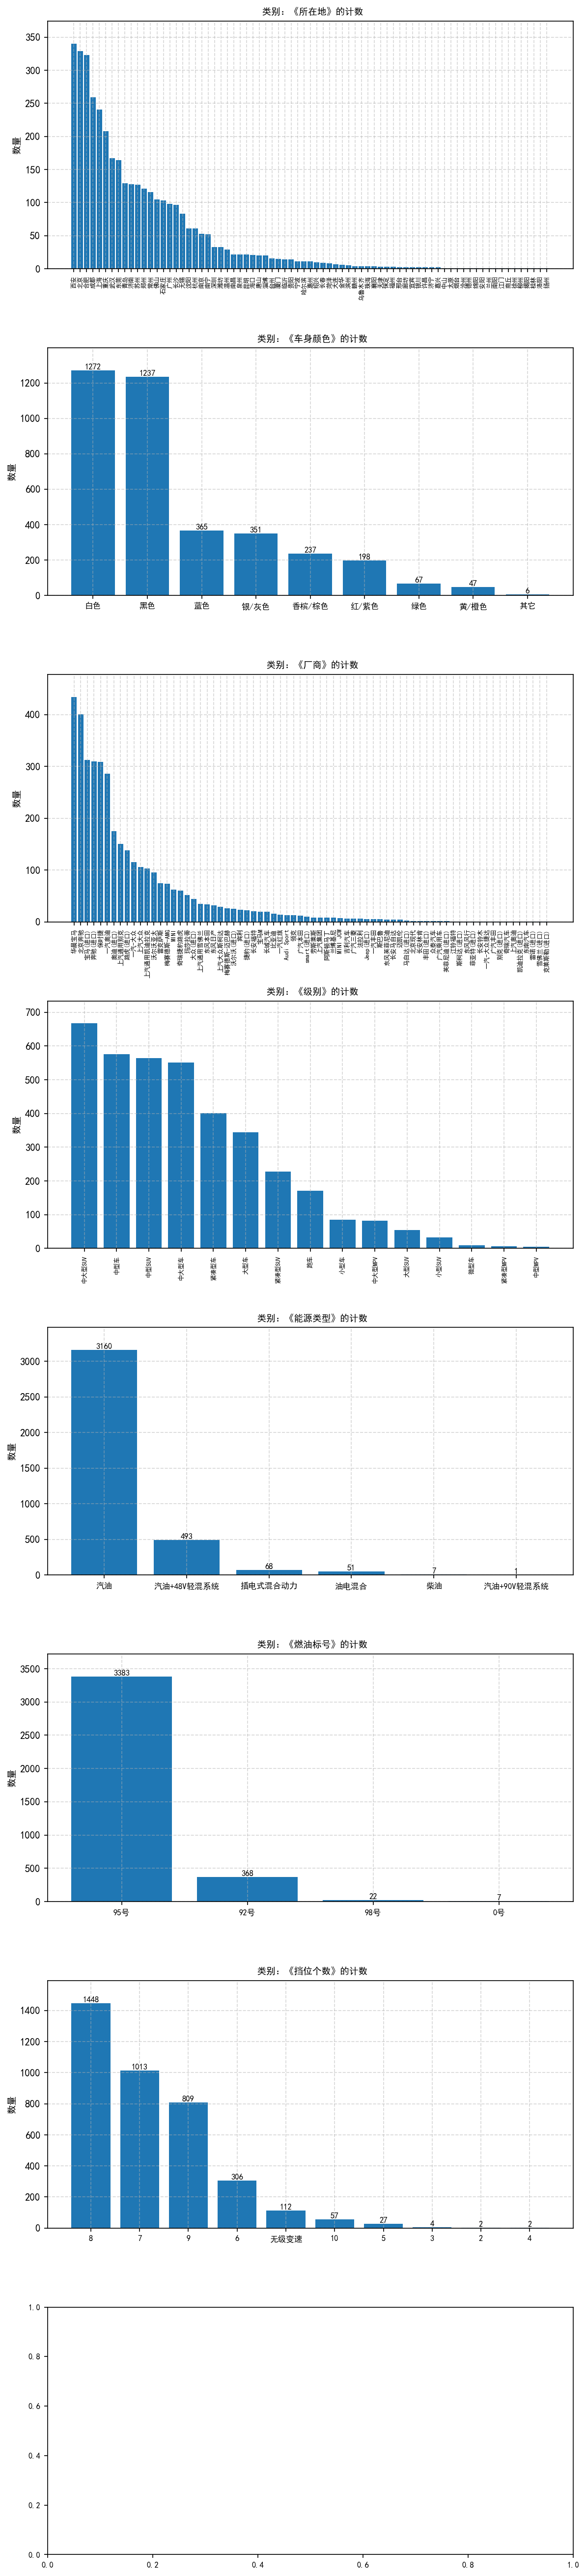

In [18]:
fig, ax = plt.subplots(8, 1, figsize=[8, 35])
index = 0
for column in cat_col:
    if vehicles_data[column].nunique() < 100:
        # Bar plot:
        bars = ax[index].bar(x=vehicles_data[column].value_counts().index,
                             height=vehicles_data[column].value_counts())
        
        if vehicles_data[column].nunique() < 11:
             # Numeric label above each bar (only if few labels)
            ax[index].bar_label(bars)
            ax[index].tick_params(axis='x', rotation=0, labelsize= 8)
            ax[index].tick_params(axis='y', labelsize= 10)

        # Rotation of axis labels for better visuals
        else:
            ax[index].tick_params(axis='x', rotation=90, labelsize= 6)
            ax[index].tick_params(axis='y', labelsize= 10)
        ax[index].set_ylabel('数量', fontsize=9)
        
        # Set the subplot title
        ax[index].set_title(f" 类别：《{column}》的计数", fontdict = {"fontsize": 9, "fontweight": "bold"})
        
        # Add a grid to the subplot
        ax[index].grid(linestyle="dashed", alpha=0.5)

        ax[index].margins(y=0.1)
        
        # Increment the subplot index
        index += 1

plt.tight_layout()
plt.show()

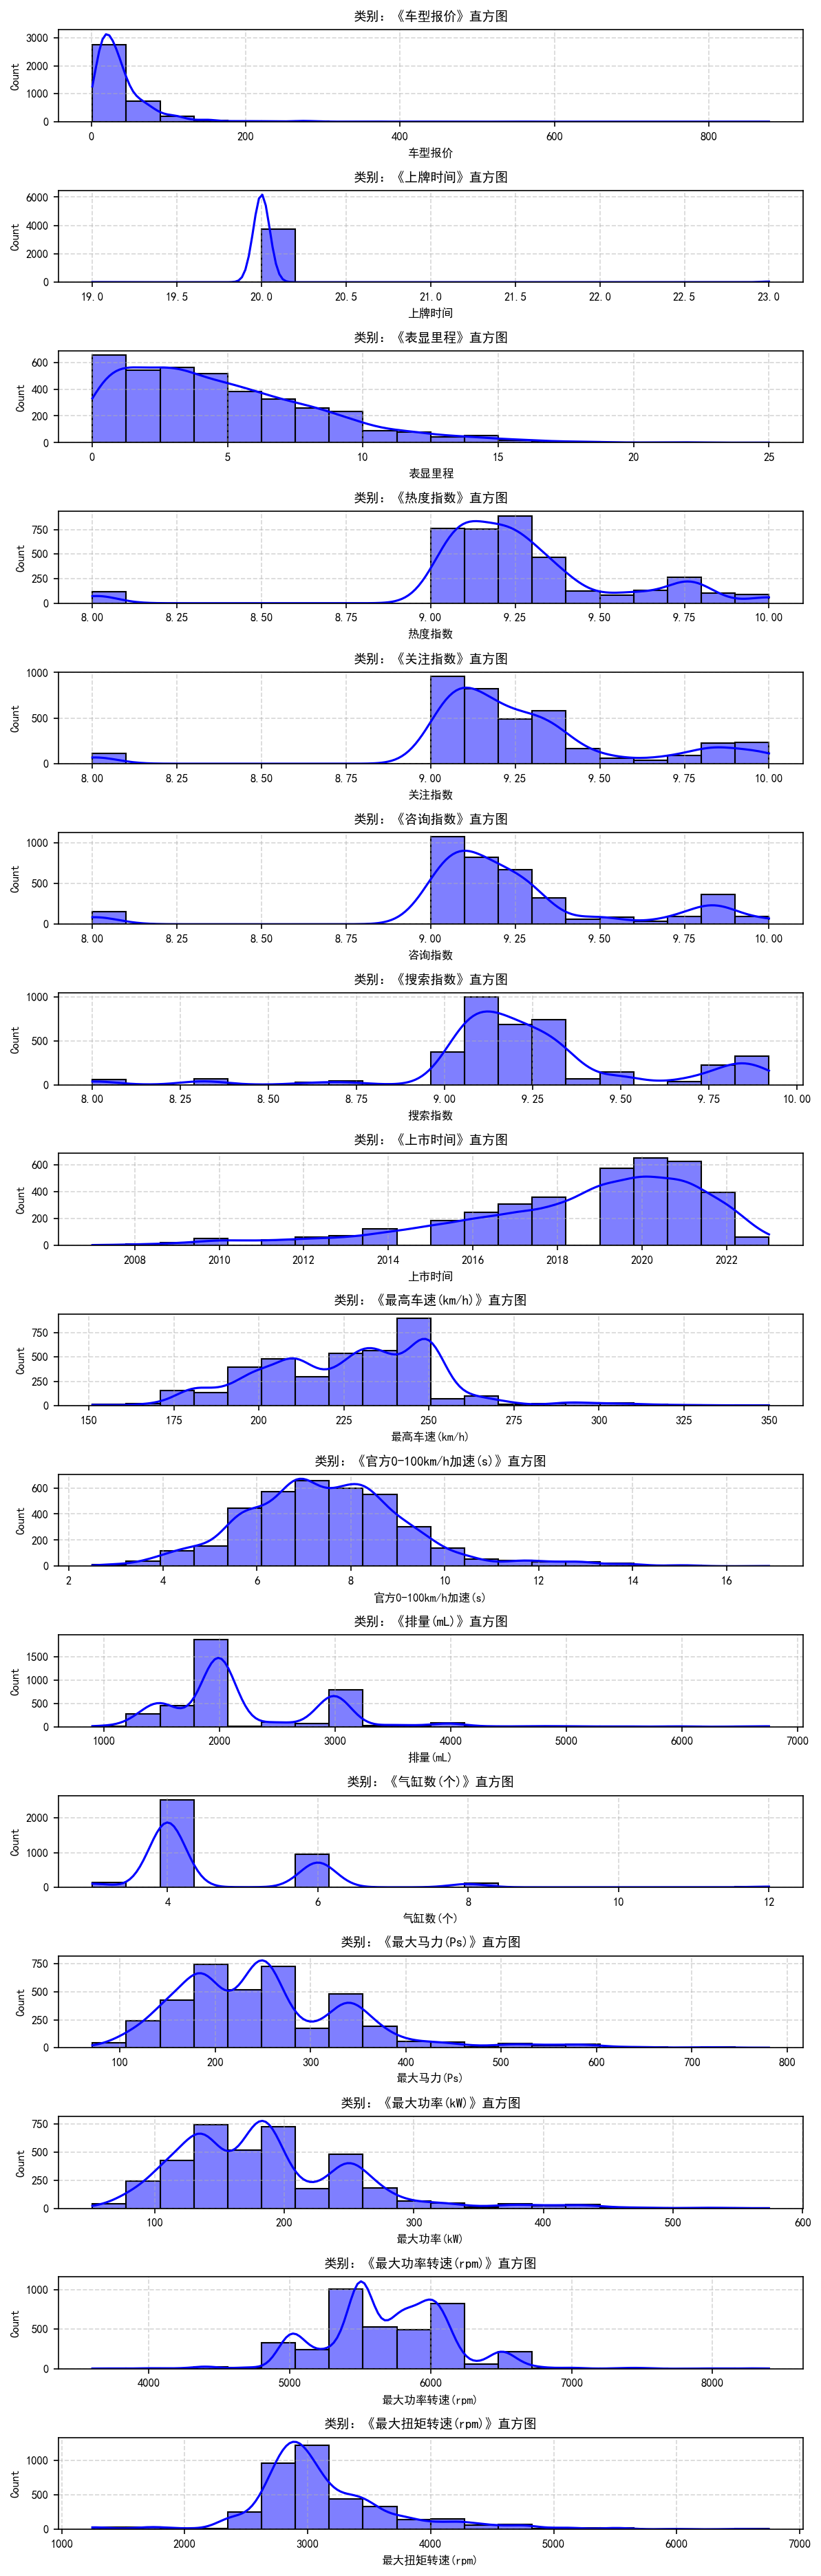

In [19]:
fig, ax = plt.subplots(16, 1, figsize=[8, 25])
index = 0
for index, column in enumerate(num_col):
    # Histplot:
    sns.histplot(ax=ax[index], x=vehicles_data[column], bins=20, kde=True, color='blue')

    # Set the subplot title
    ax[index].set_title(f"类别：《{column}》直方图", fontdict = {"fontsize": 9, "fontweight": "bold"})
        
    # Add a grid to the subplot
    ax[index].grid(linestyle="dashed", alpha=0.5)
    
plt.tight_layout()
plt.show()

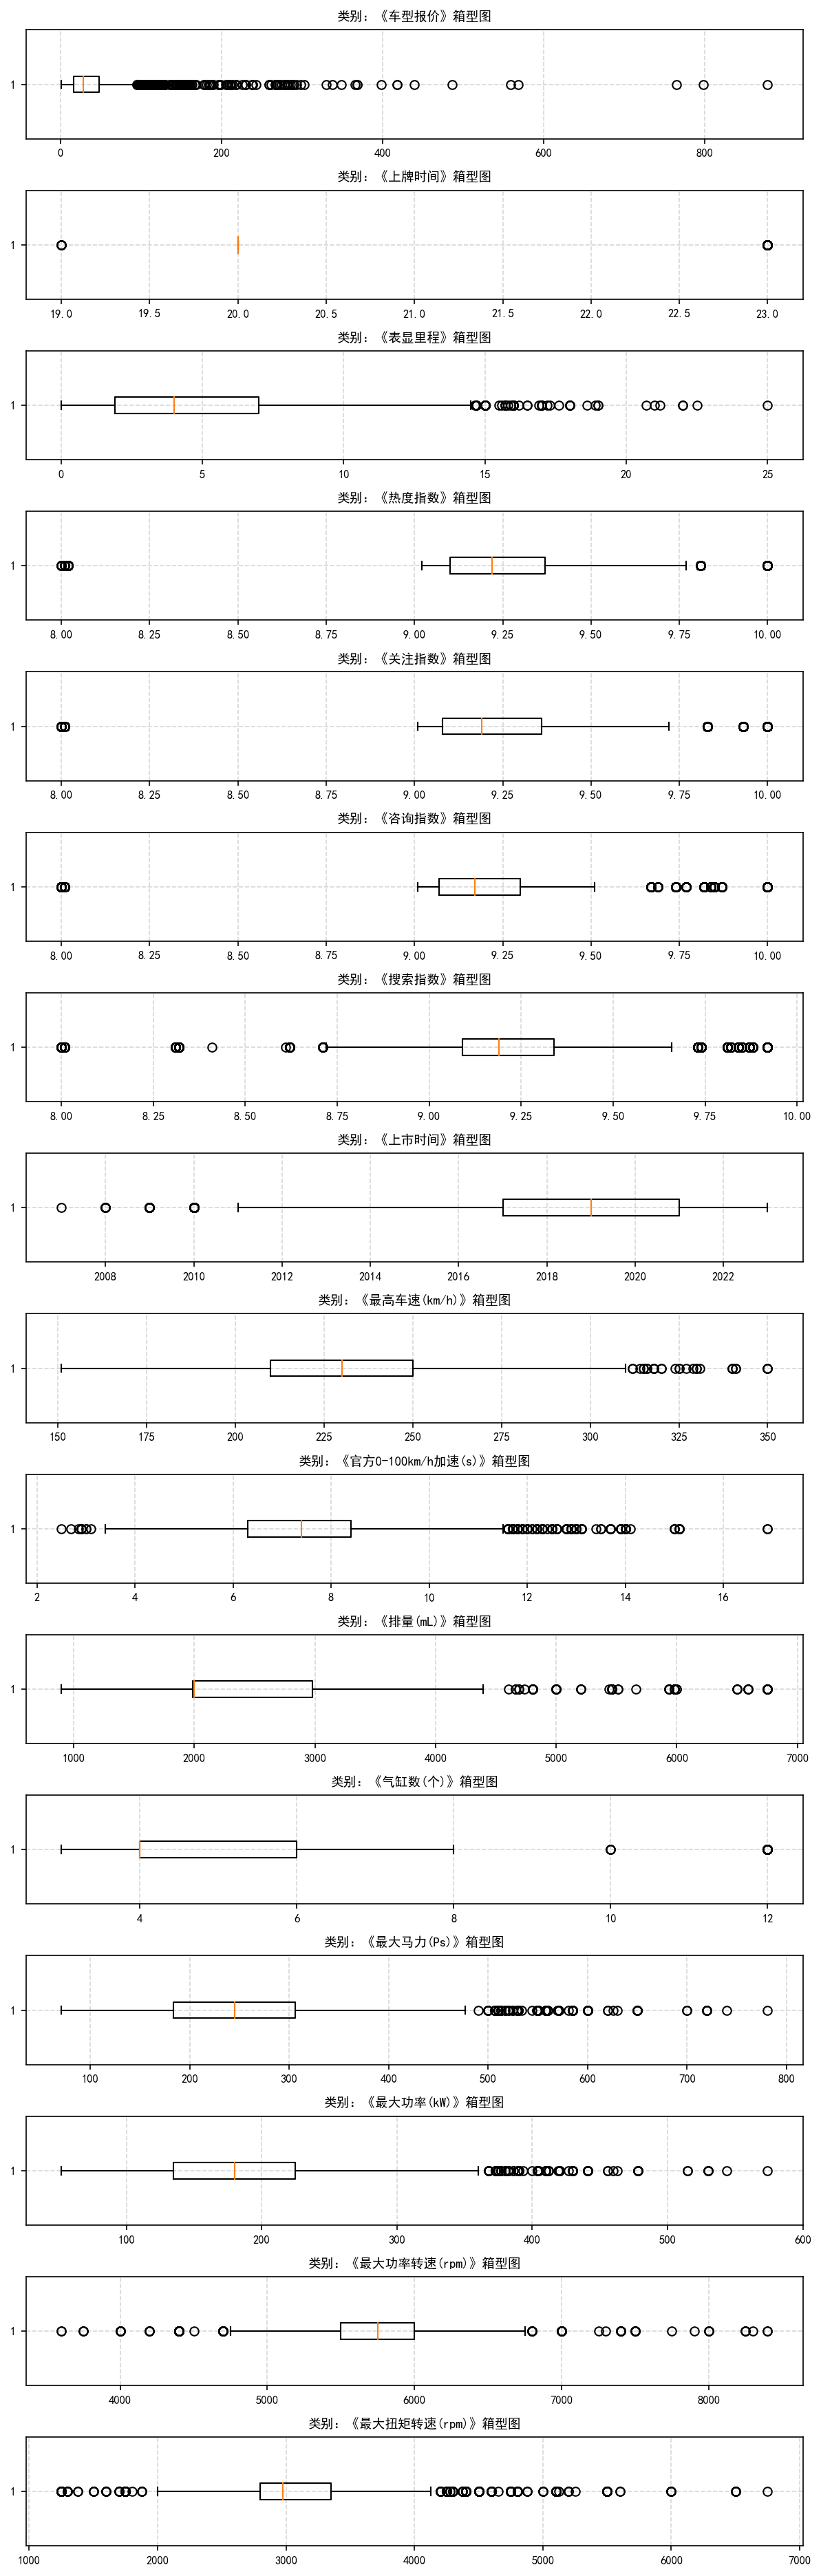

In [20]:
fig, ax = plt.subplots(16, 1, figsize=[8, 25])
index = 0
for column in num_col:
    # Histplot:
    ax[index].boxplot(vehicles_data[column].dropna(), vert=False)

    # Set the subplot title
    ax[index].set_title(f"类别：《{column}》箱型图", fontdict = {"fontsize": 9, "fontweight": "bold"})
        
    # Add a grid to the subplot
    ax[index].grid(linestyle="dashed", alpha=0.5)

    # Increment the subplot index
    index += 1

plt.tight_layout()
plt.show()

In [21]:
import seaborn as sns

In [25]:
from wordcloud import WordCloud

In [26]:
font_path = 'C:\Windows\Fonts\simhei.ttf'
wordcloud = WordCloud(font_path=font_path,
                    background_color='white', # 设置背景颜色 默认是black

                    width=800, height=600,
                    max_words=100, # 词云显示的最大词语数量100
                    max_font_size=99, # 设置字体最大值99
                    min_font_size=15, # 设置子图最小值15
                    random_state=50) # 设置随机生成多少种配色方案)

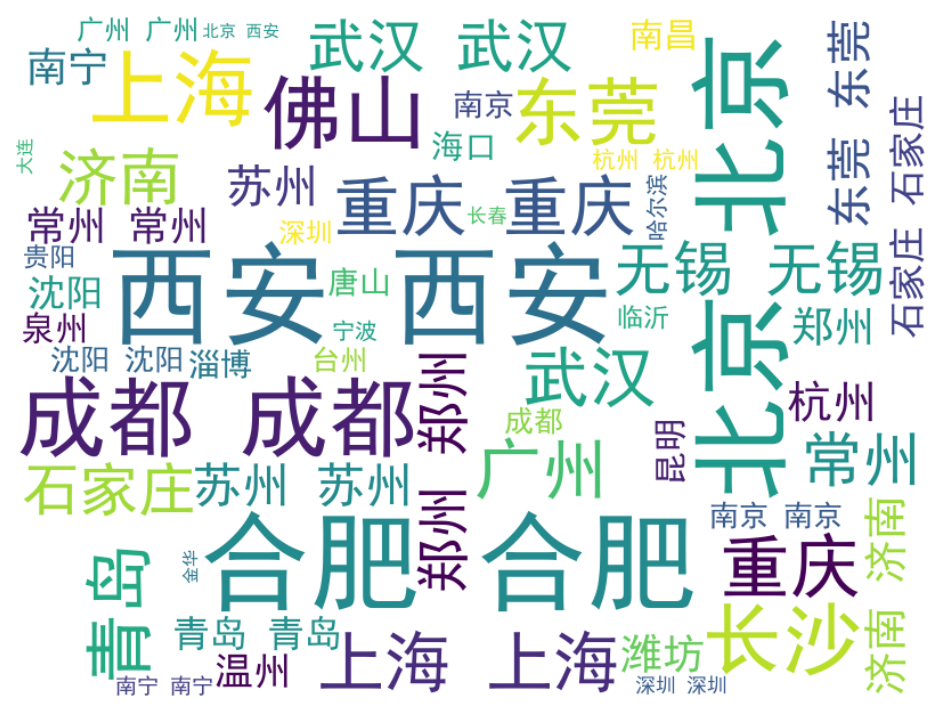

In [27]:
wordcloud.generate(' '.join(vehicles_data['所在地'].astype(str)))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

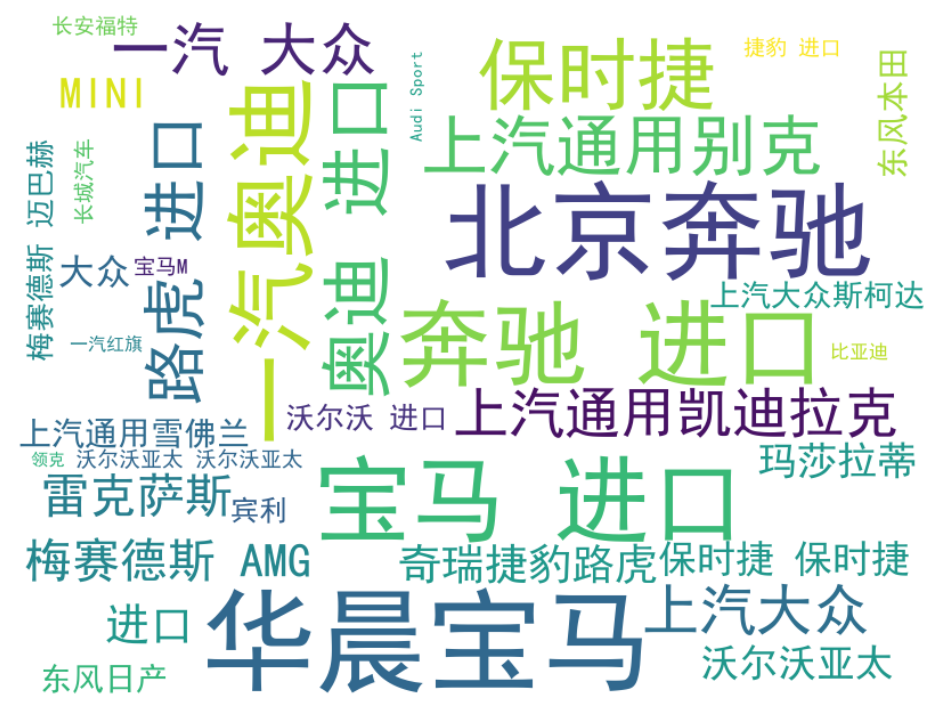

In [28]:
wordcloud.generate(' '.join(vehicles_data['厂商'].astype(str)))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

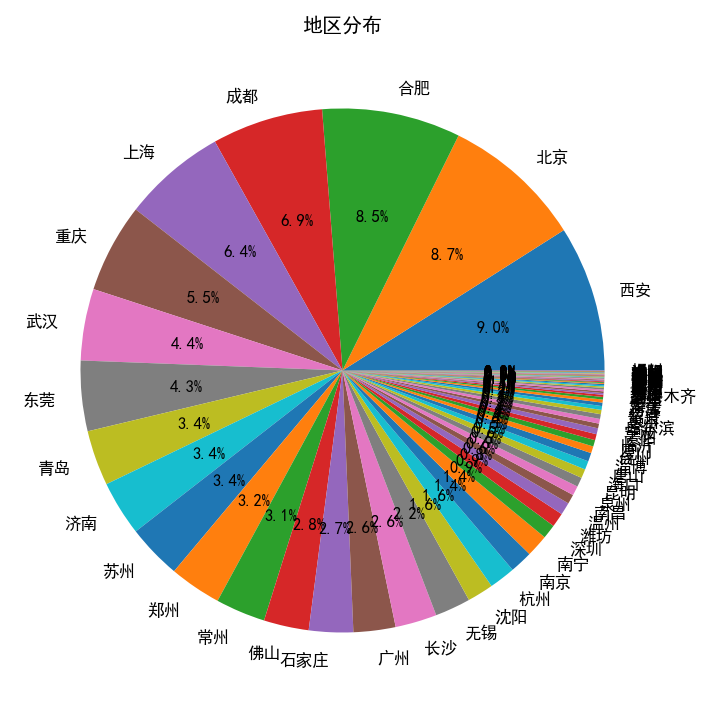

In [29]:
plt.pie(vehicles_data['所在地'].value_counts(), labels=vehicles_data['所在地'].value_counts().index, autopct='%1.1f%%')
plt.title('地区分布')
plt.show()

In [30]:
vehicles_data.corr()

,车型报价,上牌时间,表显里程,热度指数,关注指数,咨询指数,搜索指数,上市时间,最高车速(km/h),官方0-100km/h加速(s),排量(mL),气缸数(个),最大马力(Ps),最大功率(kW),最大功率转速(rpm),最大扭矩转速(rpm)
车型报价,1.000000,0.114335,-0.233390,-0.004474,-0.091405,-0.091006,-0.069376,0.170399,0.459115,-0.512950,0.638657,0.652218,0.730112,0.730195,0.276065,0.119616
上牌时间,0.114335,1.000000,-0.099711,0.001761,-0.017604,-0.014838,-0.011470,0.088983,0.006243,-0.045513,0.057967,0.058366,0.074281,0.074359,0.004649,-0.011114
表显里程,-0.233390,-0.099711,1.000000,0.086630,0.084221,0.082080,0.087621,-0.732088,-0.021413,0.093208,0.119067,0.090400,-0.049153,-0.049263,-0.068280,0.072386
热度指数,-0.004474,0.001761,0.086630,1.000000,0.839277,0.883392,0.938280,0.069833,0.219328,-0.038422,-0.022338,-0.062927,-0.028728,-0.028645,-0.009806,-0.113948
关注指数,-0.091405,-0.017604,0.084221,0.839277,1.000000,0.921074,0.957954,0.063711,0.132018,0.068753,-0.139616,-0.168605,-0.165429,-0.165535,-0.023017,-0.173818
咨询指数,-0.091006,-0.014838,0.082080,0.883392,0.921074,1.000000,0.980922,0.079022,0.115006,0.082933,-0.136208,-0.163724,-0.165073,-0.165048,-0.049353,-0.171776
搜索指数,-0.069376,-0.011470,0.087621,0.938280,0.957954,0.980922,1.000000,0.074393,0.154919,0.046606,-0.109379,-0.141849,-0.131766,-0.131764,-0.031313,-0.162041
上市时间,0.170399,0.088983,-0.732088,0.069833,0.063711,0.079022,0.074393,1.000000,-0.064953,-0.056830,-0.240286,-0.217143,-0.030168,-0.029999,-0.027324,-0.173806
最高车速(km/h),0.459115,0.006243,-0.021413,0.219328,0.132018,0.115006,0.154919,-0.064953,1.000000,-0.774953,0.543352,0.527911,0.652263,0.652123,0.354321,0.125949
官方0-100km/h加速(s),-0.512950,-0.045513,0.093208,-0.038422,0.068753,0.082933,0.046606,-0.056830,-0.774953,1.000000,-0.627182,-0.588939,-0.803946,-0.803929,-0.322717,-0.138427


C:\Program Files\anaconda\envs\learn\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
C:\Program Files\anaconda\envs\learn\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


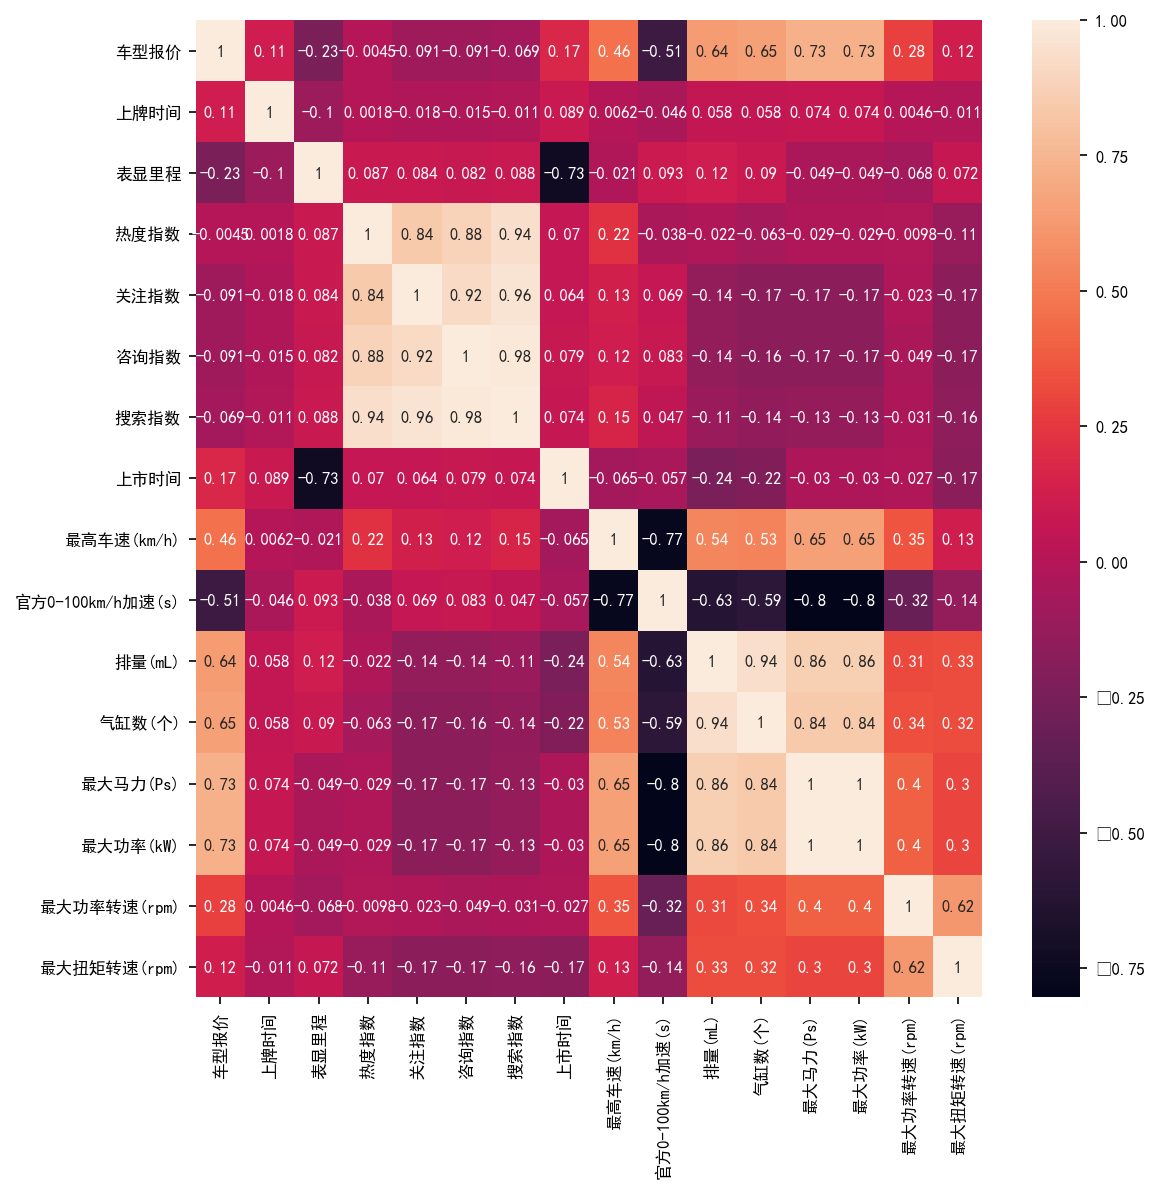

In [31]:
plt.figure(figsize =(8,8))
sns.heatmap(vehicles_data.corr(), annot=True)
plt.show()

In [28]:
vehicles_data.columns

Index(['车型名称', '车型报价', '上牌时间', '表显里程', '所在地', '车身颜色', '热度指数', '关注指数', '咨询指数',
       '搜索指数', '厂商', '级别', '能源类型', '上市时间', '最高车速(km/h)', '官方0-100km/h加速(s)',
       '排量(mL)', '气缸数(个)', '最大马力(Ps)', '最大功率(kW)', '最大功率转速(rpm)',
       '最大扭矩转速(rpm)', '燃油标号', '挡位个数'],
      dtype='object')

In [ ]:
vehicles_data['车型名称']=pd.Categorical(vehicles_data['车型名称']).codes
vehicles_data['所在地']=pd.Categorical(vehicles_data['所在地']).codes

vehicles_data['厂商']=pd.Categorical(vehicles_data['厂商']).codes
vehicles_data['级别']=pd.Categorical(vehicles_data['级别']).codes

In [34]:
vehicles_data['能源类型']=pd.Categorical(vehicles_data['能源类型']).codes

In [36]:
vehicles_data['燃油标号']=pd.Categorical(vehicles_data['燃油标号']).codes

In [41]:
vehicles_data['挡位个数']=pd.Categorical(vehicles_data['挡位个数']).codes

In [31]:
del vehicles_data['车身颜色']

In [84]:
del vehicles_data['车型名称']
del vehicles_data['所在地']
del vehicles_data['车身颜色']
del vehicles_data['厂商']
del vehicles_data['级别']

In [85]:
del vehicles_data['能源类型']
del vehicles_data['燃油标号']

In [86]:
del vehicles_data['挡位个数']

In [29]:
vehicles_data.drop(['热度指数','关注指数','咨询指数','搜索指数'],axis=1,inplace = True)

In [42]:
vehicles_data[:10]

,车型名称,车型报价,上牌时间,表显里程,所在地,厂商,级别,能源类型,上市时间,最高车速(km/h),官方0-100km/h加速(s),排量(mL),气缸数(个),最大马力(Ps),最大功率(kW),最大功率转速(rpm),最大扭矩转速(rpm),燃油标号,挡位个数
0,723,66.68,2022.0,0.57,71,37,4,2,2021.0,218,7.4,1991,4,258,190.0,6100.0,2900.0,2,8
3,571,29.80,2019.0,6.60,66,30,5,3,2019.0,230,8.7,1497,4,184,135.0,6100.0,3500.0,2,8
5,795,261.80,2022.0,1.20,15,49,4,2,2021.0,220,4.5,3982,8,585,430.0,6000.0,3000.0,2,8
6,1850,1.58,2012.0,3.40,36,15,9,2,2011.0,176,12.3,1399,4,103,76.0,6000.0,4200.0,1,4
7,1447,32.60,2023.0,1.40,37,32,1,2,2022.0,210,8.9,1998,4,184,135.0,5750.0,2675.0,2,7
9,491,39.99,2020.0,7.50,60,37,5,2,2019.0,250,6.4,1991,4,258,190.0,6100.0,2900.0,2,8
10,1449,35.98,2022.0,0.55,74,32,1,2,2022.0,235,6.8,1998,4,252,185.0,5850.0,3125.0,2,7
11,1709,17.98,2021.0,3.40,40,14,1,2,2020.0,210,7.8,1998,4,237,174.0,5000.0,2750.0,2,8
17,2121,123.00,2015.0,5.00,20,41,7,2,2014.0,295,5.2,3993,8,507,373.0,6000.0,1750.0,3,7
18,972,31.80,2017.0,17.00,20,38,7,2,2016.0,250,6.2,2995,6,290,213.0,5675.0,3675.0,2,7


In [43]:
import os
path = os.path.abspath(os.path.dirname(os.getcwd()) + os.path.sep + ".")

output_path = path + '/user_data/'

nn_data = pd.DataFrame(vehicles_data)

nn_data.to_csv(output_path+'vehicles_data_20231024coded.csv', index=0, sep=' ')

In [38]:
vehicles_data.columns

Index(['车型名称', '车型报价', '上牌时间', '表显里程', '所在地', '厂商', '级别', '能源类型', '上市时间',
       '最高车速(km/h)', '官方0-100km/h加速(s)', '排量(mL)', '气缸数(个)', '最大马力(Ps)',
       '最大功率(kW)', '最大功率转速(rpm)', '最大扭矩转速(rpm)', '燃油标号', '挡位个数'],
      dtype='object')

In [40]:
vehicles_data.describe()

,车型名称,车型报价,上牌时间,表显里程,所在地,厂商,级别,能源类型,上市时间,最高车速(km/h),官方0-100km/h加速(s),排量(mL),气缸数(个),最大马力(Ps),最大功率(kW),最大功率转速(rpm),最大扭矩转速(rpm),燃油标号
count,3775.000000,3775.000000,3775.000000,3775.000000,3775.000000,3775.000000,3775.000000,3775.000000,3775.000000,3775.000000,3775.000000,3775.000000,3775.000000,3775.000000,3775.000000,3775.000000,3775.000000,3775.000000
mean,1022.109669,41.006254,2019.427285,4.799539,35.318940,30.695629,5.730331,2.133510,2018.561060,227.234172,7.505197,2252.770861,4.661457,251.850861,185.167603,5697.300795,3127.264901,1.904371
std,614.383424,48.582698,2.781182,3.644887,24.774382,16.182151,4.224725,0.556008,2.902938,26.455685,1.812638,761.825485,1.258079,94.877936,69.791358,463.623761,603.080336,0.318348
min,0.000000,1.350000,2008.000000,0.010000,0.000000,0.000000,0.000000,0.000000,2007.000000,151.000000,2.500000,898.000000,3.000000,71.000000,52.000000,3600.000000,1250.000000,0.000000
25%,507.500000,16.395000,2018.000000,1.940000,10.000000,16.000000,2.000000,2.000000,2017.000000,210.000000,6.300000,1984.000000,4.000000,184.000000,135.000000,5500.000000,2800.000000,2.000000
50%,996.000000,28.680000,2020.000000,4.000000,32.000000,32.000000,4.000000,2.000000,2019.000000,230.000000,7.400000,1998.000000,4.000000,245.000000,180.000000,5750.000000,2975.000000,2.000000
75%,1514.000000,47.800000,2021.000000,7.000000,61.000000,39.000000,7.000000,2.000000,2021.000000,250.000000,8.400000,2979.000000,6.000000,306.000000,225.000000,6000.000000,3350.000000,2.000000
max,2162.000000,878.000000,2023.000000,25.000000,74.000000,71.000000,14.000000,5.000000,2023.000000,350.000000,16.900000,6753.000000,12.000000,781.000000,574.000000,8400.000000,6750.000000,3.000000


In [95]:
vehicles_data.shape

(3770, 12)